Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

## Importar las librerías necesarias

In [1]:
from librerias import *
from funciones import *

## Cargar la data

In [2]:
data_df = pd.read_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\data-science-pt-2023-01\Machine_Learning\Entregas\Prueba_Tecnica_Nivel\data\train.csv")
test_df = pd.read_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\data-science-pt-2023-01\Machine_Learning\Entregas\Prueba_Tecnica_Nivel\data\test.csv")

## Exploración inicial de la data

In [3]:
data_df.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


In [4]:
data_df.set_index('ID', inplace=True)

In [5]:
test_df.set_index('ID', inplace=True)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5597 entries, 4995 to 3294
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5597 non-null   float64
 1   col2    5597 non-null   float64
 2   col3    5597 non-null   float64
 3   col4    5597 non-null   float64
 4   col5    5597 non-null   float64
 5   col6    5597 non-null   float64
 6   col7    5597 non-null   float64
 7   col8    5597 non-null   float64
 8   col9    5597 non-null   float64
 9   col10   5597 non-null   float64
 10  col11   5597 non-null   float64
 11  col12   5597 non-null   float64
 12  col13   5597 non-null   float64
 13  col14   5597 non-null   float64
 14  col15   5597 non-null   float64
 15  col16   5597 non-null   float64
 16  col17   5597 non-null   float64
 17  col18   5597 non-null   float64
 18  col19   5597 non-null   float64
 19  col20   5597 non-null   float64
 20  target  5597 non-null   int64  
dtypes: float64(20), int64(1)
memory us

In [7]:
key_stats = data_df.describe().T
key_stats

,count,mean,std,min,25%,50%,75%,max
col1,5597.0,0.674797,1.273677,0.000,0.040,0.070,0.290,5.05
col2,5597.0,14.438840,8.851097,-0.080,6.850,14.390,22.260,29.84
col3,5597.0,0.163603,0.254659,0.000,0.030,0.050,0.100,1.05
col4,5597.0,1.579702,1.221220,0.000,0.550,1.210,2.510,4.94
col5,5597.0,0.042747,0.036072,0.000,0.008,0.040,0.070,0.13
col6,5597.0,2.213093,2.581244,0.000,0.100,0.550,4.330,8.66
col7,5597.0,0.250890,0.272472,0.000,0.050,0.090,0.450,0.90
col8,5597.0,0.807654,0.652471,0.000,0.090,0.750,1.390,2.00
col9,5597.0,0.766057,0.436435,0.000,0.400,0.760,1.160,1.50
col10,5597.0,0.324309,0.328954,0.000,0.000,0.230,0.610,1.00


### Otras medidas clave

In [8]:
# Varianza
data_df.var()

col1        1.622253
col2       78.341919
col3        0.064851
col4        1.491378
col5        0.001301
col6        6.662819
col7        0.074241
col8        0.425718
col9        0.190475
col10       0.108211
col11       0.142395
col12       0.003364
col13      31.156435
col14       0.323458
col15       0.000009
col16     314.346961
col17       5.416543
col18       0.000831
col19       0.020785
col20       0.000725
target      0.101290
dtype: float64

In [9]:
# Skewness
data_df.skew()

col1      1.997938
col2      0.005050
col3      1.955333
col4      0.639019
col5      0.481603
col6      0.860083
col7      1.003708
col8      0.250723
col9     -0.025741
col10     0.528396
col11     0.416238
col12    -0.080111
col13    -0.034701
col14    -0.513028
col15    -0.090616
col16     0.917223
col17     0.543592
col18     0.018460
col19     0.999755
col20    -0.041646
target    2.424371
dtype: float64

In [10]:
# Kurtosis
data_df.kurt()

col1      2.658457
col2     -1.226148
col3      2.545491
col4     -0.754380
col5     -0.981251
col6     -0.743854
col7     -0.434397
col8     -1.350580
col9     -1.177783
col10    -1.156620
col11    -1.594174
col12    -1.147532
col13    -1.209607
col14    -0.361353
col15    -1.158110
col16    -0.541057
col17    -0.929624
col18    -1.112021
col19    -0.357747
col20    -1.178915
target    3.878959
dtype: float64

<AxesSubplot:>

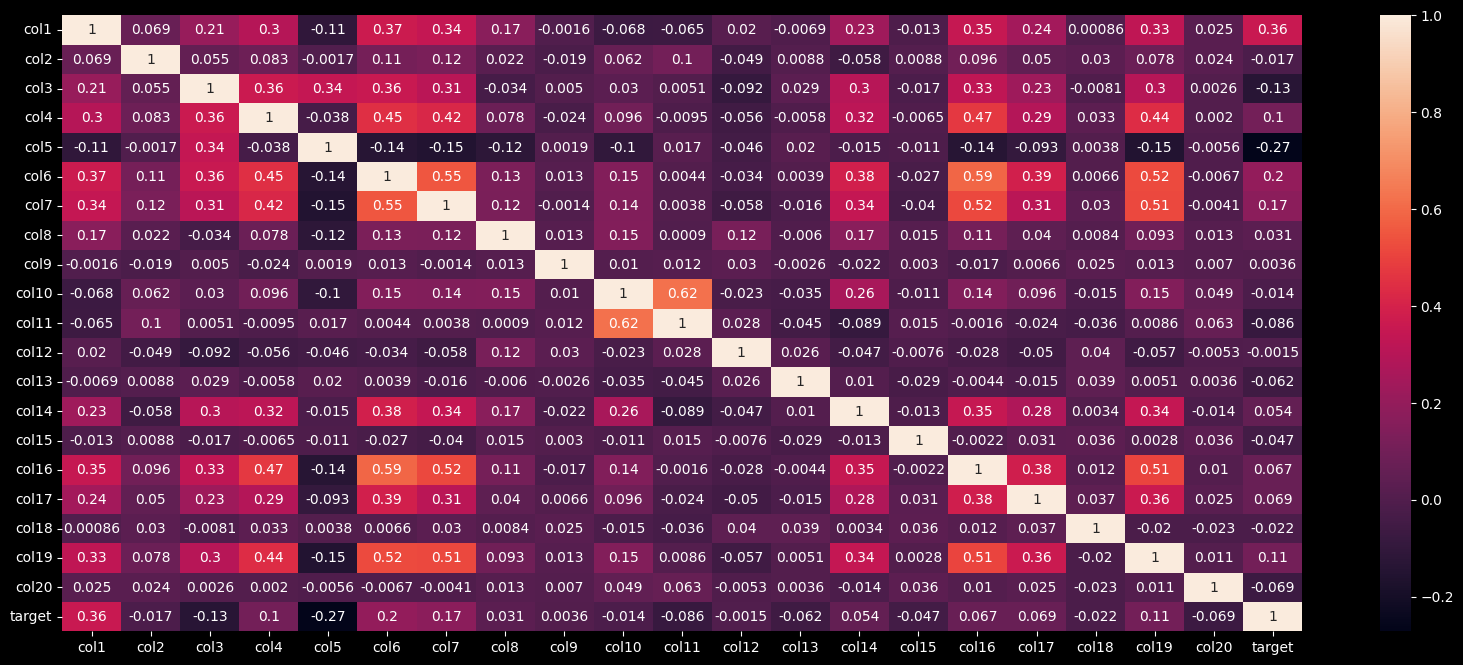

In [11]:
# Matriz de Correlación
data_corr = data_df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(data_corr, annot=True)

In [12]:
# Correlación con target
data_corr[["target"]].sort_values(by="target" , ascending=False)

,target
target,1.000000
col1,0.358168
col6,0.198555
col7,0.174420
col19,0.105710
col4,0.104875
col17,0.069023
col16,0.067342
col14,0.054494
col8,0.031497


## Visualización de datos

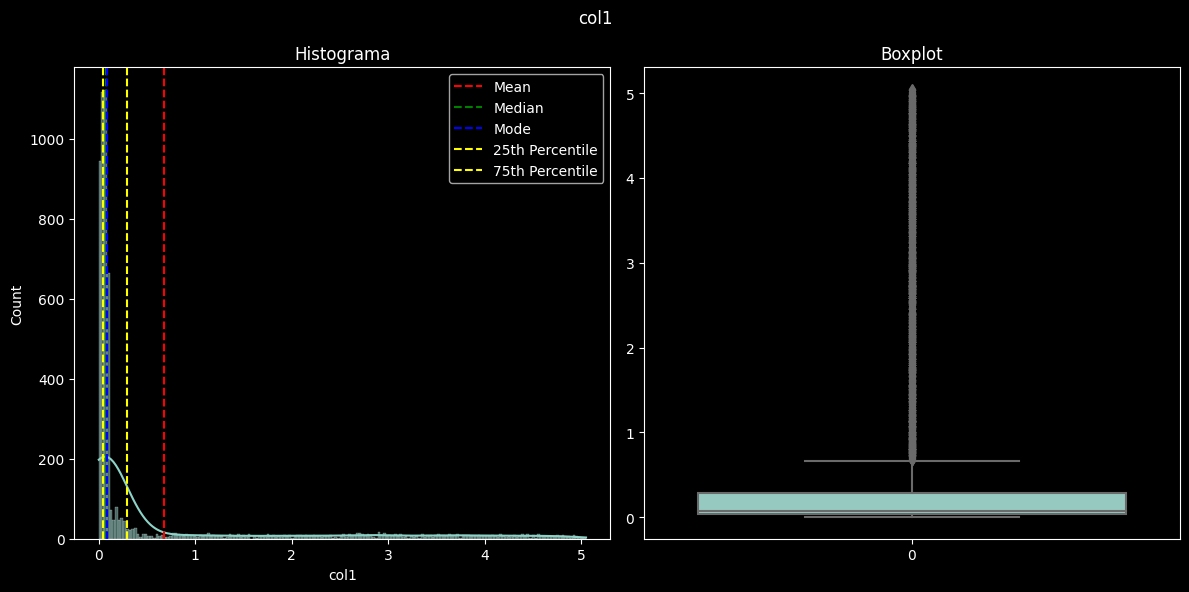

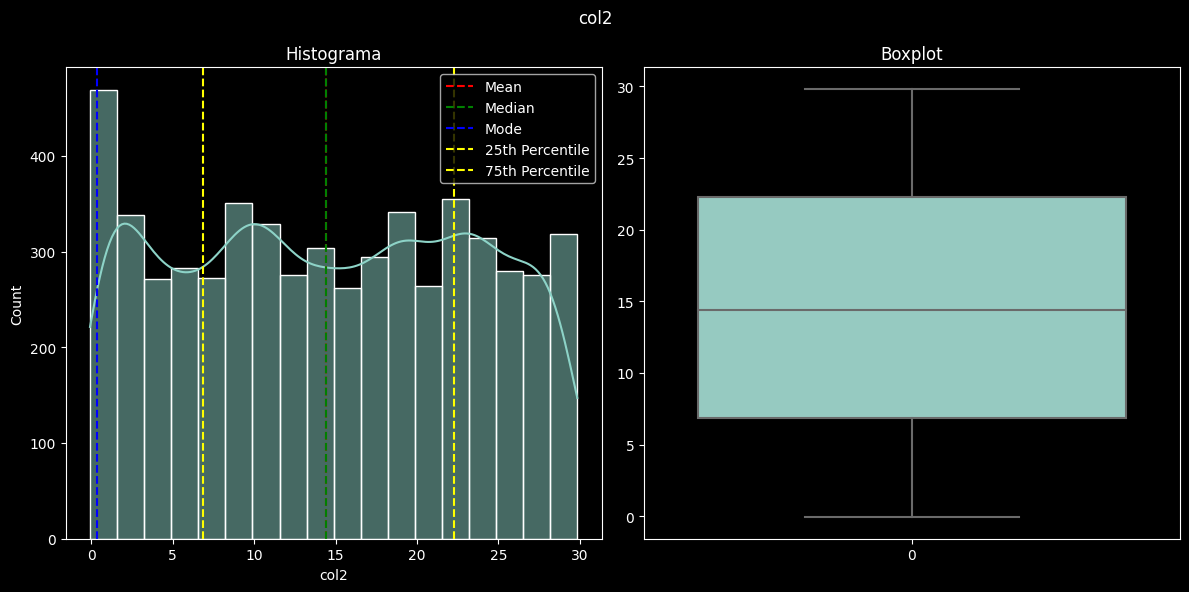

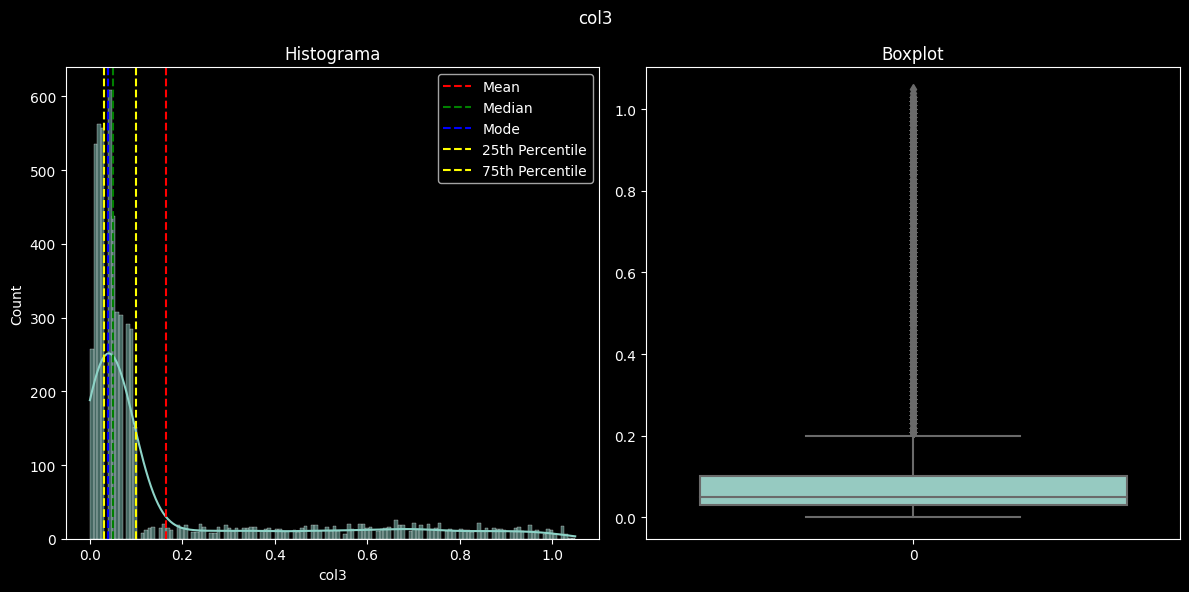

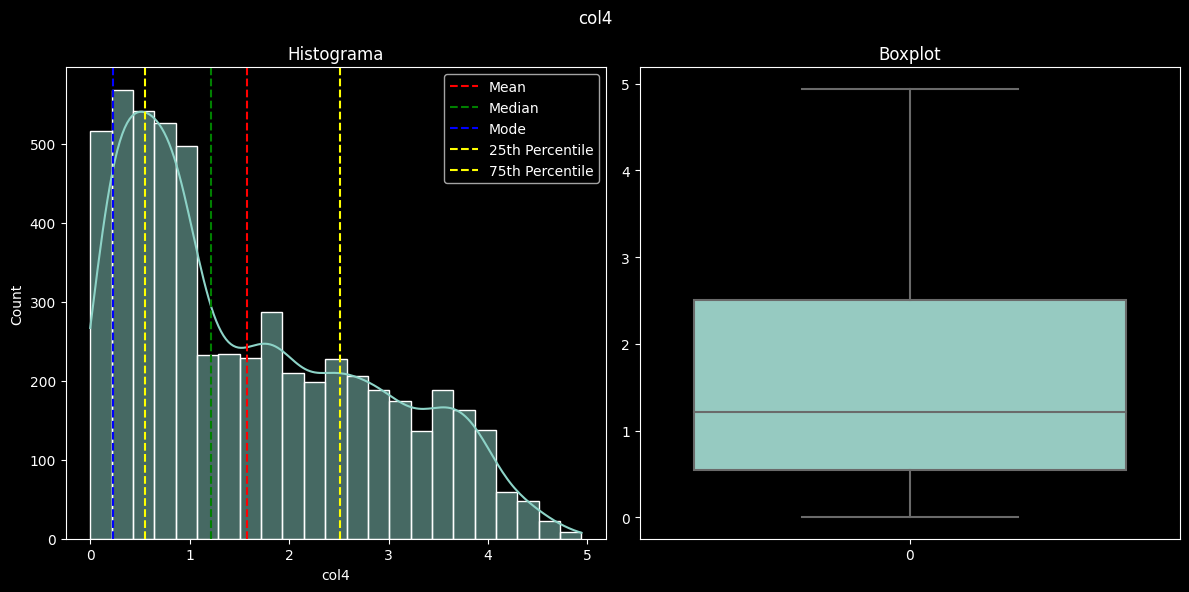

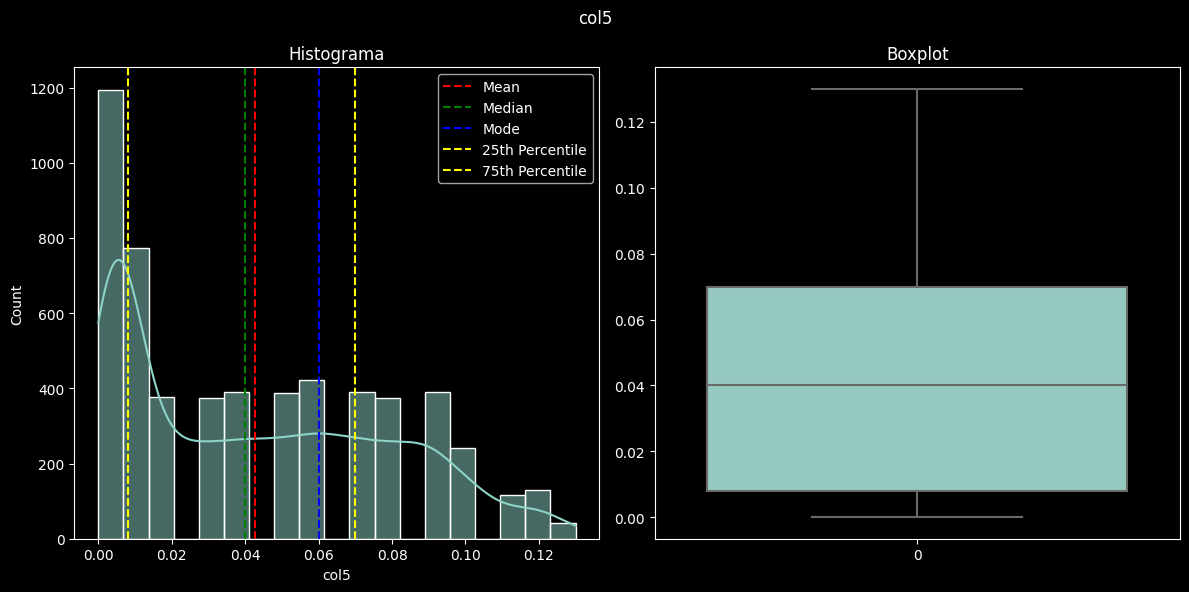

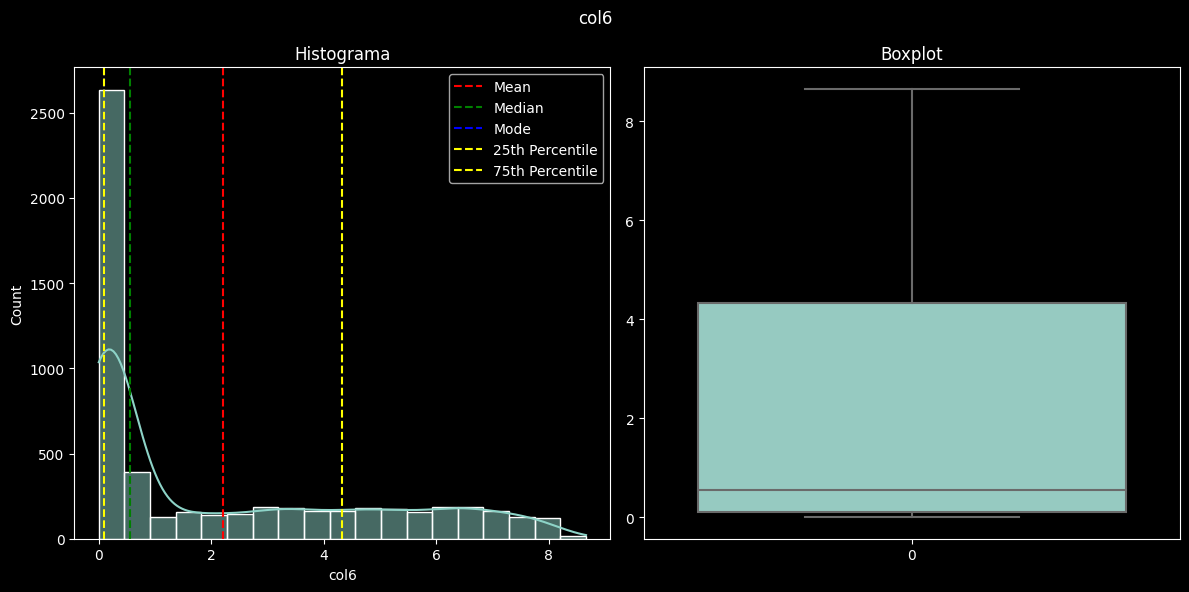

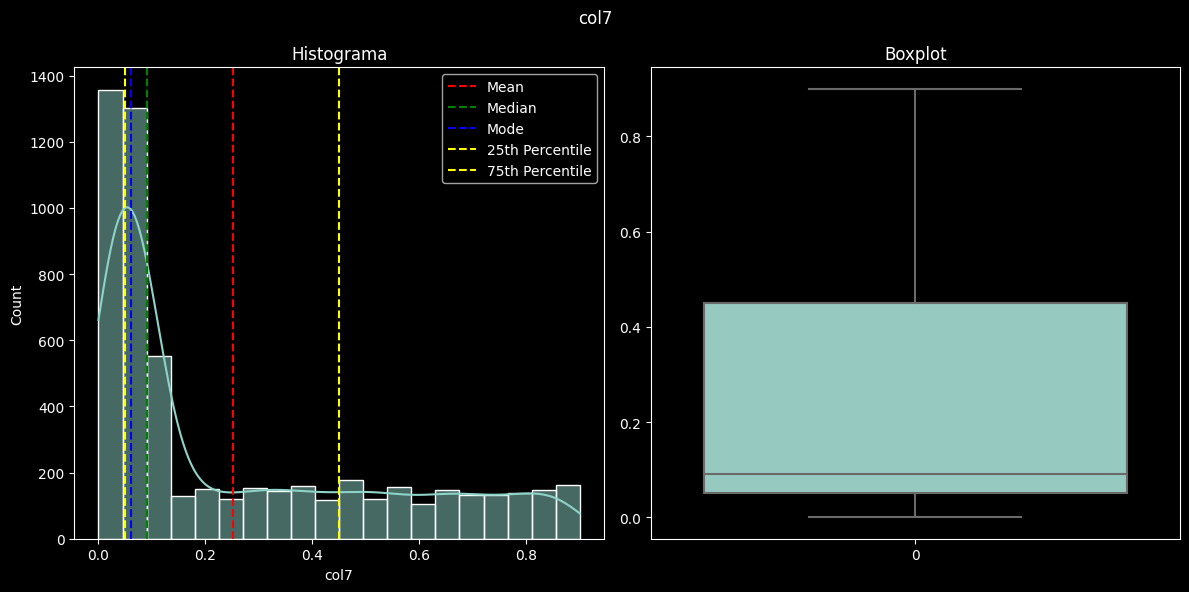

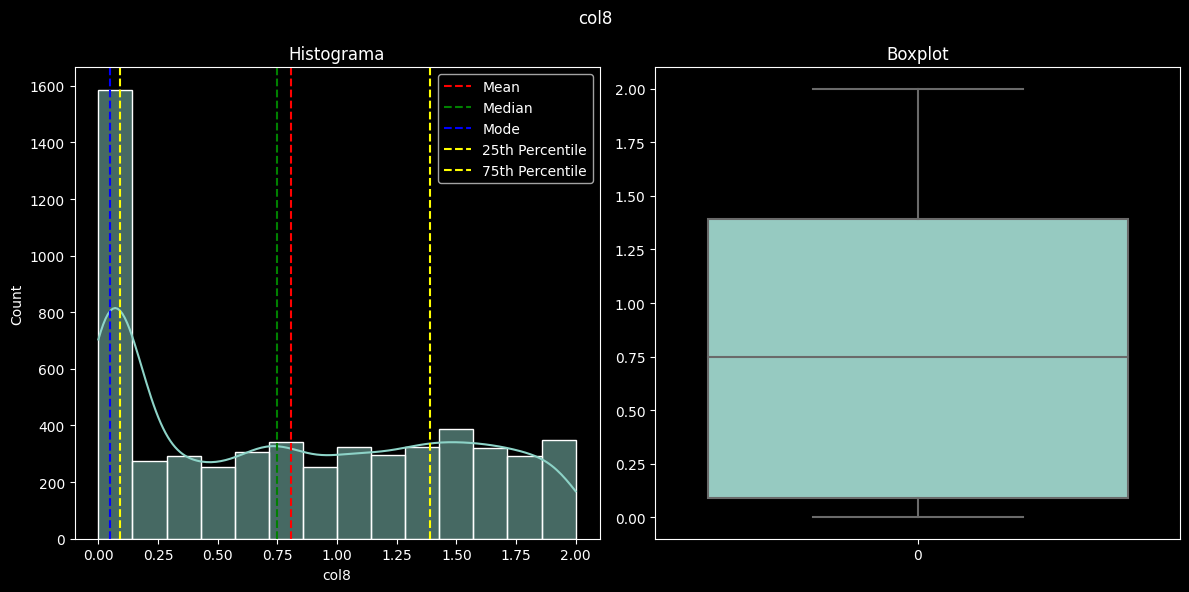

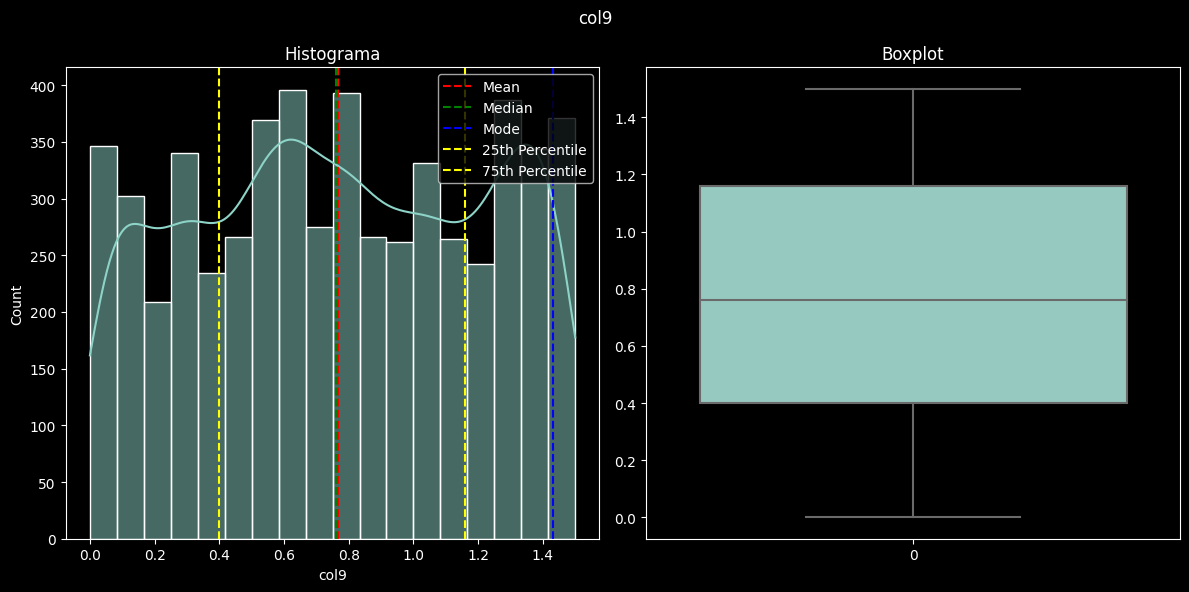

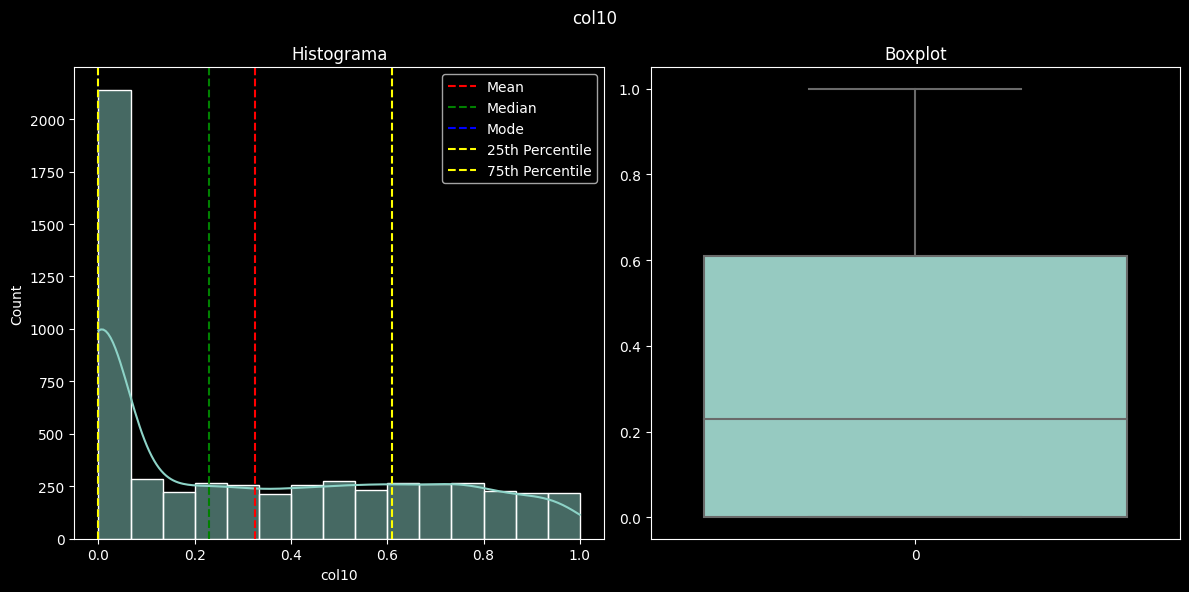

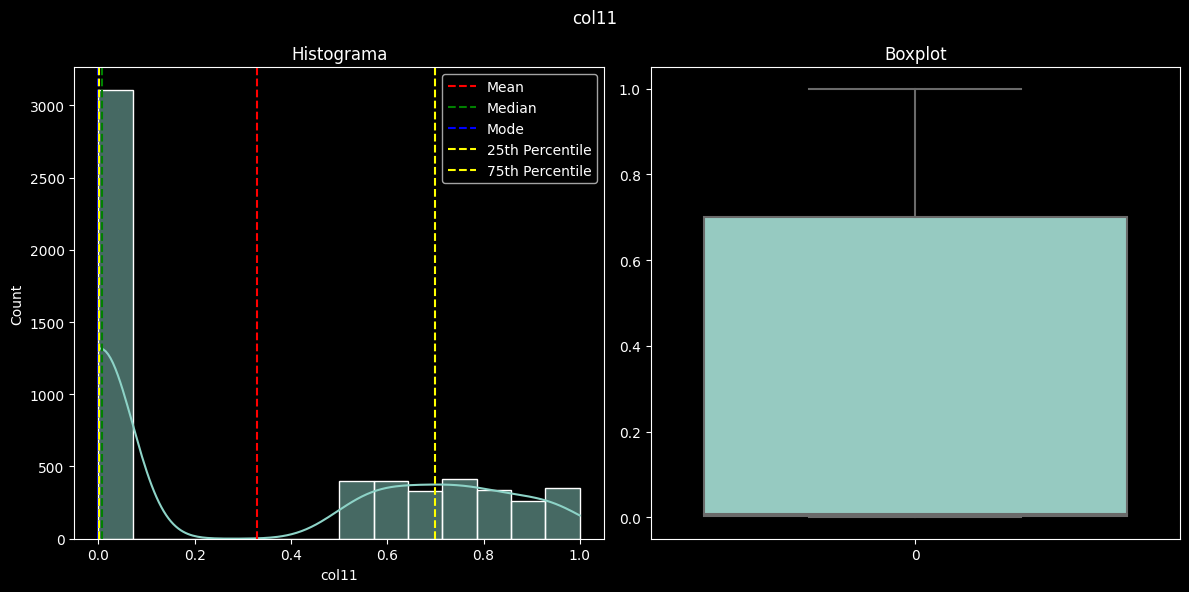

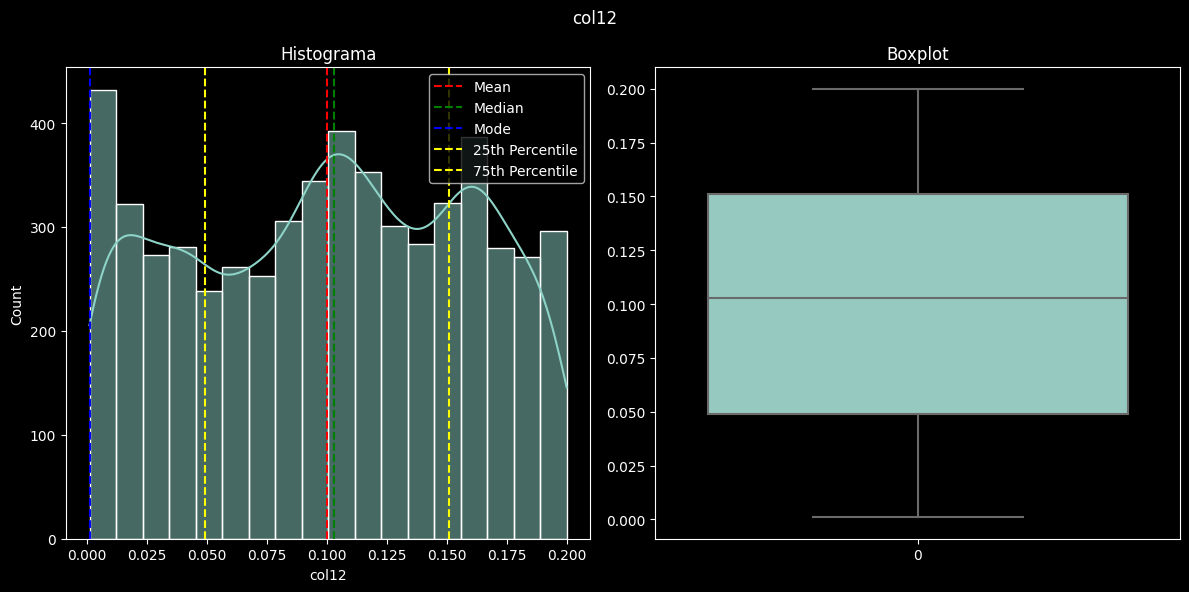

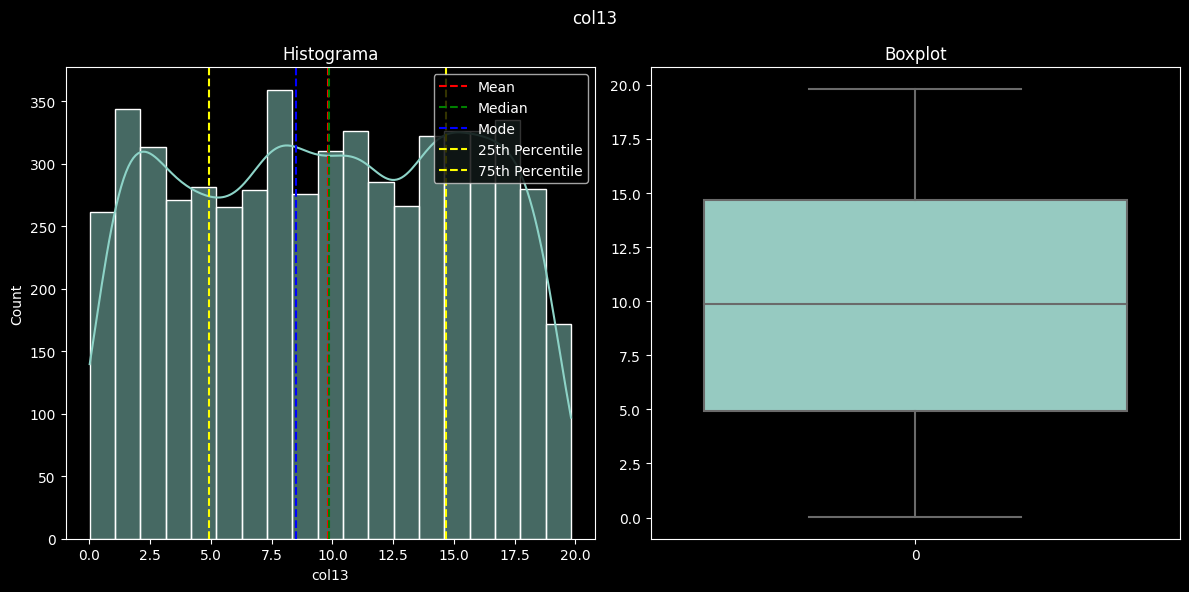

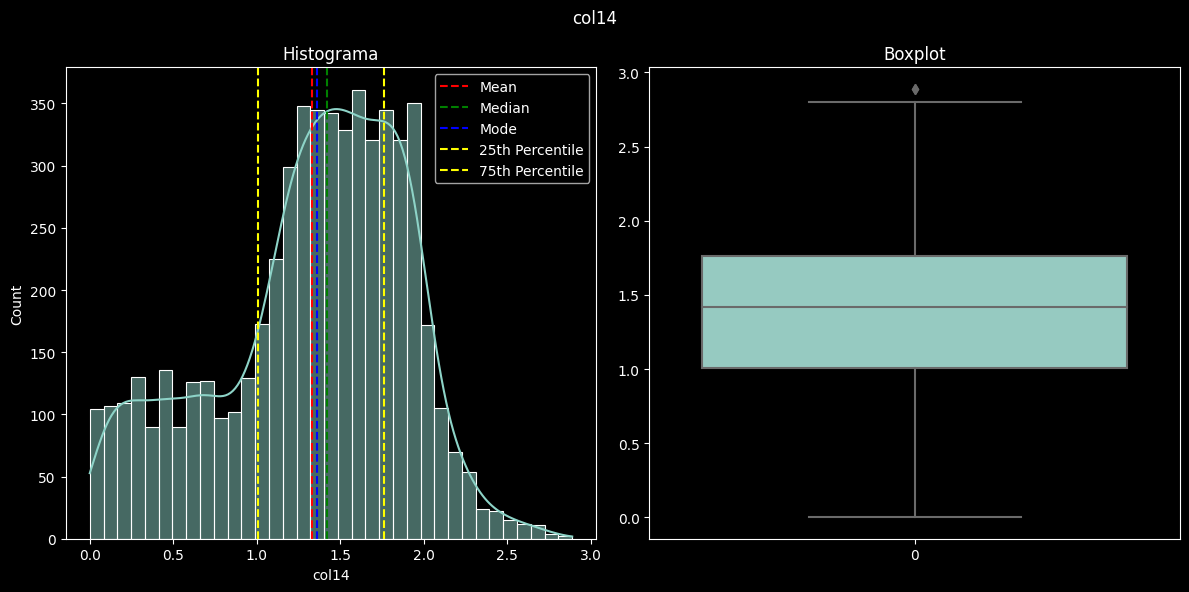

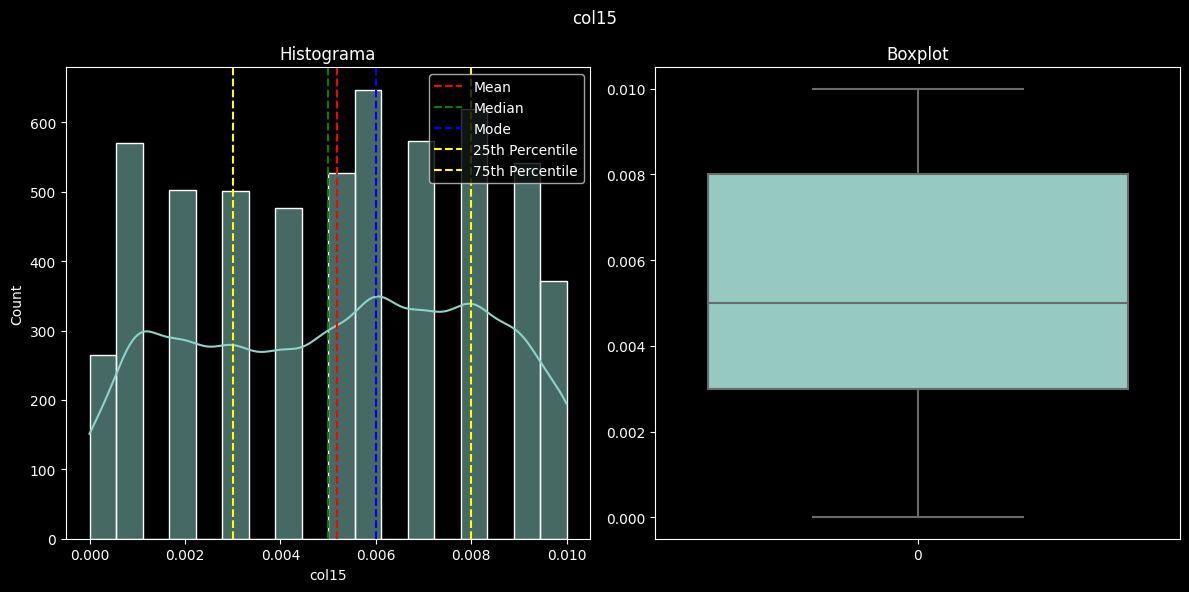

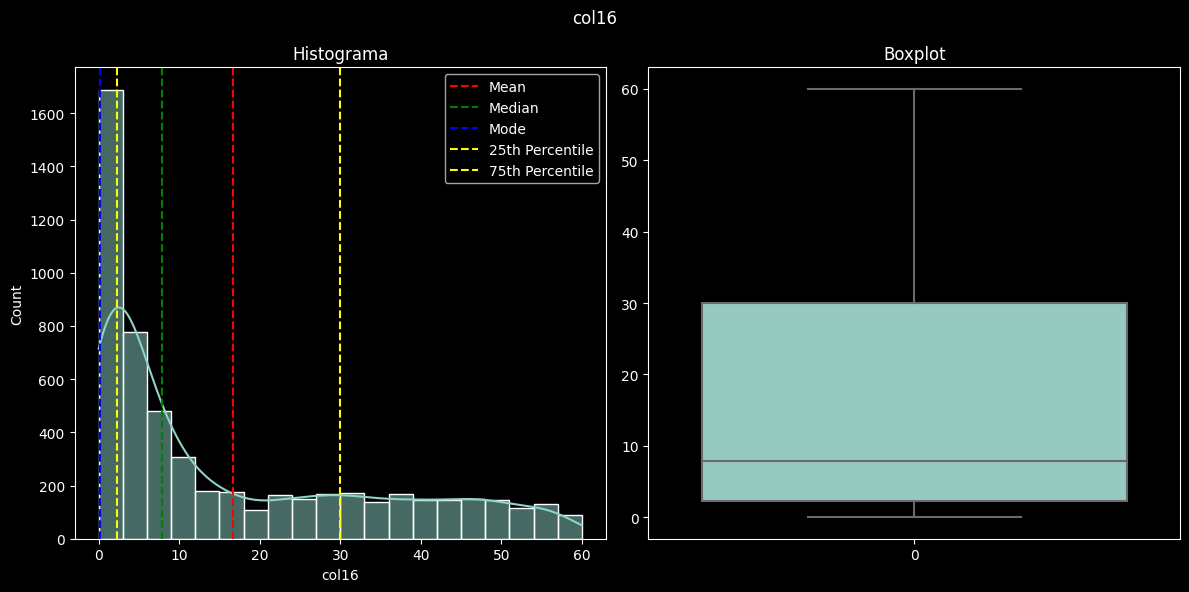

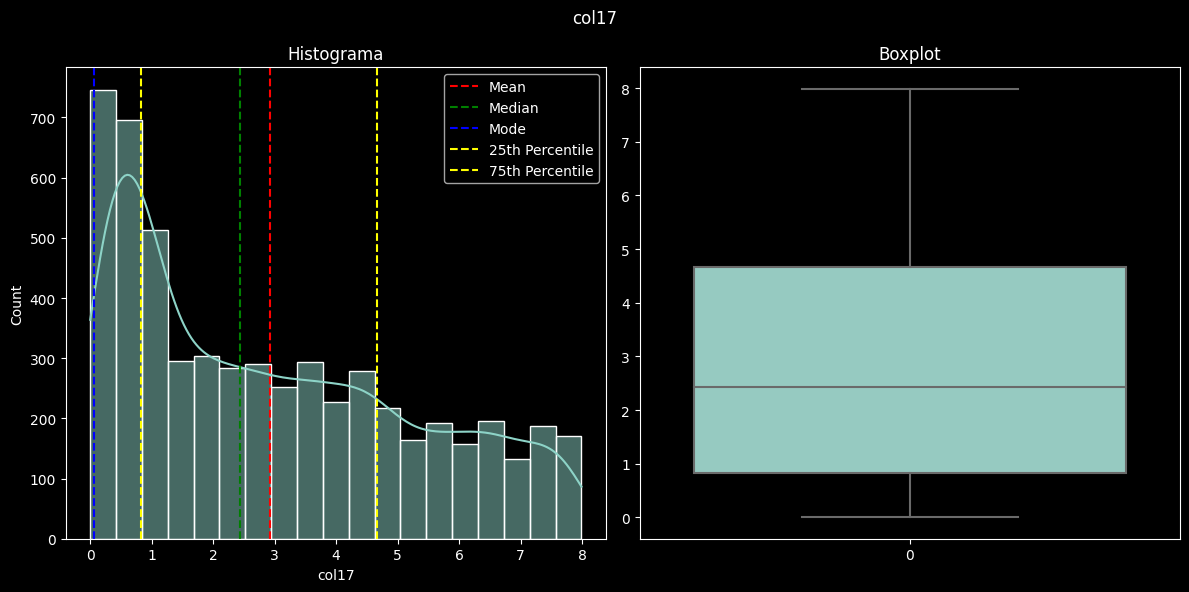

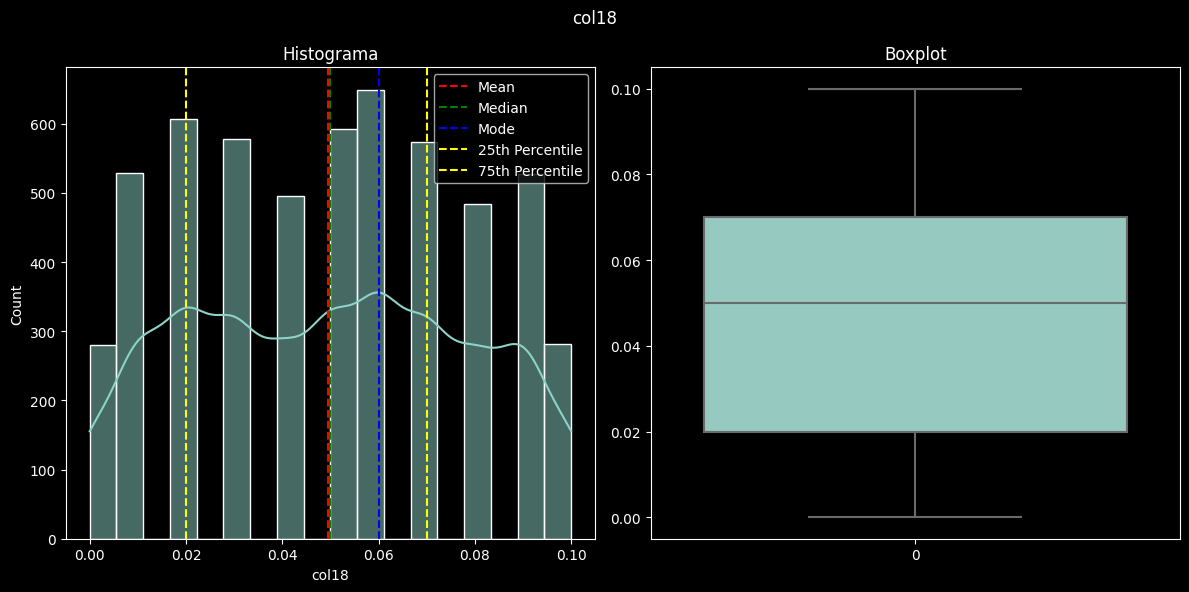

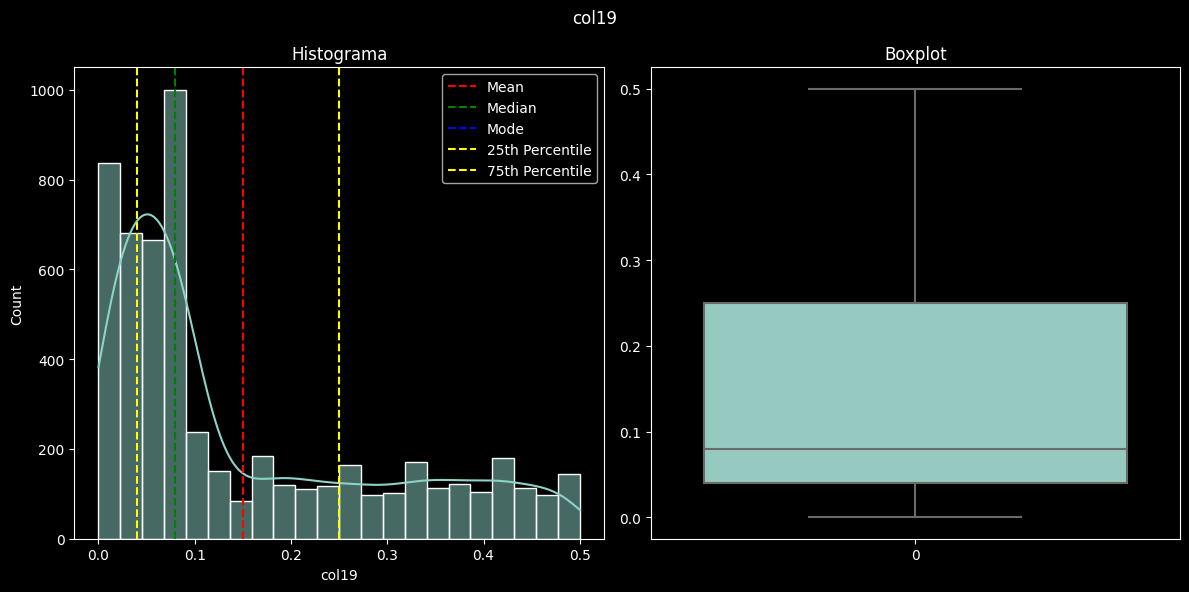

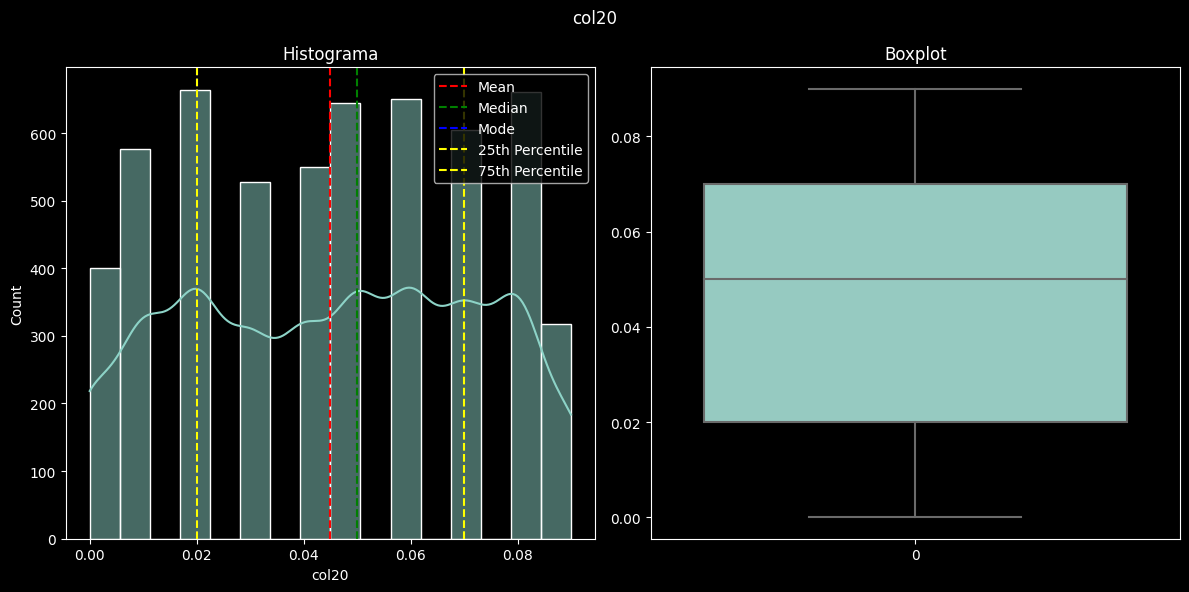

In [12]:
visualizacion_datos(data_df)

## Limpieza de datos

In [13]:
# Division de datos
X = data_df.drop("target", axis=1)
y = data_df["target"]

In [14]:
# Division de datos para entrenamiento
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [15]:
# Escalar los datos
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Creación de modelos de baseline

In [16]:
# Creación del pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", None)
])

In [17]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC())
]

In [23]:
# Parametros del gridsearch
param_grid = {
    'model': [ DecisionTreeClassifier(), RandomForestClassifier()],
    'classifier__max_depth': [None, 3, 5, 10],
    'classifier__n_estimators': [50, 100, 200]
}

In [19]:
# cross-validation para cada modelo en el pipeline con 5 folds
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)

for name, model in models:
    pipeline.set_params(model=model)

    scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')

    print(f'{name} Cross-Validation Results:')
    print(f'Accuracy: {scores.mean():.4f} (±{scores.std():.4f})')
    print(scores)
    print('---')

Logistic Regression Cross-Validation Results:
Accuracy: 0.9122 (±0.0106)
[0.90959821 0.89285714 0.92290503 0.91731844 0.91843575]
---
Decision Tree Cross-Validation Results:
Accuracy: 0.9433 (±0.0044)
[0.93973214 0.93973214 0.9396648  0.94972067 0.94748603]
---
Random Forest Cross-Validation Results:
Accuracy: 0.9558 (±0.0097)
[0.95647321 0.93973214 0.96312849 0.96759777 0.95195531]
---
KNN Cross-Validation Results:
Accuracy: 0.9069 (±0.0069)
[0.91183036 0.89508929 0.91284916 0.91173184 0.9027933 ]
---
SVM Cross-Validation Results:
Accuracy: 0.9401 (±0.0096)
[0.9453125  0.92410714 0.95195531 0.94413408 0.93519553]
---


In [20]:
# Entrenar y evaluar cada modelo en el pipeline
model_dict = {}
final_pred_dict = {}
for name, model in models:
    pipeline.set_params(model=model)
    pipeline.fit(X_train, y_train)  
    y_pred = pipeline.predict(X_test)
    final_pred = pipeline.predict(test_df)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'ROC AUC: {roc_auc}')
    print('---')

    model_dict[name] = accuracy
    final_pred_dict[name] = final_pred

Logistic Regression Metrics:
Accuracy: 0.9053571428571429
Precision: 0.7049180327868853
ROC AUC: 0.6550220362923456
---
Decision Tree Metrics:
Accuracy: 0.9473214285714285
Precision: 0.78125
ROC AUC: 0.8675236764717233
---
Random Forest Metrics:
Accuracy: 0.95
Precision: 0.9120879120879121
ROC AUC: 0.8127494037465555
---
KNN Metrics:
Accuracy: 0.90625
Precision: 0.6710526315789473
ROC AUC: 0.6820174592270702
---
SVM Metrics:
Accuracy: 0.93125
Precision: 0.8552631578947368
ROC AUC: 0.742530430151514
---


In [21]:
best_model = max(model_dict, key=model_dict.get)
print(f'Seleccionamos el modelo {best_model} por que ha demostrado una mayor precisión')

Seleccionamos el modelo Random Forest por que ha demostrado una mayor precisión


In [32]:
final_pred = final_pred_dict[best_model]

In [40]:
test_result = pd.concat([test_df,pd.DataFrame(final_pred, columns=['target'], index=test_df.index)], axis=1)
test_result

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
ID,,,,,,,,,,,,,,,,,,,,,
2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,1.23,0.52,0.62,...,0.022,12.63,1.93,0.003,1.19,7.79,0.04,0.43,0.01,0
3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.09,1.21,0.73,...,0.001,4.49,1.95,0.009,52.30,1.00,0.10,0.12,0.01,0
7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,1.44,1.42,0.31,...,0.177,1.03,1.27,0.002,7.04,0.38,0.06,0.05,0.06,0
5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,1.18,0.88,0.00,...,0.032,4.07,0.98,0.003,1.28,0.51,0.06,0.03,0.07,0
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,0.06,0.60,0.02,0.46,0.090,0.20,0.08,0.70,0.57,0.30,...,0.065,16.31,2.12,0.008,2.73,3.53,0.03,0.07,0.03,0
1327,2.99,11.76,0.64,2.71,0.010,2.36,0.57,1.81,0.38,0.00,...,0.083,7.72,1.67,0.007,12.99,6.11,0.05,0.24,0.00,0
4739,0.08,10.53,0.09,2.97,0.010,0.65,0.05,0.04,1.38,0.00,...,0.033,7.43,0.62,0.007,4.49,0.50,0.09,0.05,0.02,0


In [31]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

rf_model = RandomForestClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

In [32]:
print("Best Model:")
print(best_model)
print(f"Best Score: {best_score}")

Best Model:
RandomForestClassifier(max_depth=7)
Best Score: 0.9533162909018357


In [33]:
rf_model = RandomForestClassifier(max_depth=7)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(test_df)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [34]:
test_result = pd.concat([test_df,pd.DataFrame(pred, columns=['target'], index=test_df.index)], axis=1)
test_result

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
ID,,,,,,,,,,,,,,,,,,,,,
2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,1.23,0.52,0.62,...,0.022,12.63,1.93,0.003,1.19,7.79,0.04,0.43,0.01,0
3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.09,1.21,0.73,...,0.001,4.49,1.95,0.009,52.30,1.00,0.10,0.12,0.01,0
7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,1.44,1.42,0.31,...,0.177,1.03,1.27,0.002,7.04,0.38,0.06,0.05,0.06,0
5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,1.18,0.88,0.00,...,0.032,4.07,0.98,0.003,1.28,0.51,0.06,0.03,0.07,0
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,0.06,0.60,0.02,0.46,0.090,0.20,0.08,0.70,0.57,0.30,...,0.065,16.31,2.12,0.008,2.73,3.53,0.03,0.07,0.03,0
1327,2.99,11.76,0.64,2.71,0.010,2.36,0.57,1.81,0.38,0.00,...,0.083,7.72,1.67,0.007,12.99,6.11,0.05,0.24,0.00,0
4739,0.08,10.53,0.09,2.97,0.010,0.65,0.05,0.04,1.38,0.00,...,0.033,7.43,0.62,0.007,4.49,0.50,0.09,0.05,0.02,0
